*Credits: Applied Data Analysis (ADA) course at EPFL (https://dlab.epfl.ch/teaching/fall2020/cs401/)*

## Visualizing high dimensional data

|*|continuous|categorical|
|---|---|---|
|**supervised**|regression|classification|
|**unsupervised**|**dim. reduction**|clustering|

Visualizing 2-dimensional data is easy, but what happens when we have more features? 

We can use dimensionality reduction techniques!

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

Let start by generating some artifical clusters with 3 features. 
We use the same number of samples and groups as the previous example:

In [2]:
n_centers = 3
total_samples = 100

# This create some artifical clusters with standard dev. = 1.5
X3d, _ = make_blobs(n_samples=total_samples, 
                     centers=n_centers, 
                     cluster_std=1.5,
                     n_features=3,
                     random_state=1)

print("The features of the first sample are: %s" % X3d[0])

The features of the first sample are: [-4.19671549 -6.62811495 -7.99113412]


To transform this features vector in a form that can be represented in a simple plot, we can reduce the number of dimensions by preserving as much information as possible. Let's see two techniques that can help in this task:

- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): tries to preserve the Global Structure of data. It is the most common dimensionality reduction technique.
- [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html): tries to preserve the Local structure of data. It is specifically designed for visualization.

### Visualize the 3d blobs

In order to properly visualize the blob groups, let's declare a K-Means model with the same number of centroids and fit it to the original dataset. Use _random\_state=0_.

In [3]:
# Cluster the data in 3 groups.

kmeans = KMeans(n_clusters=n_centers, random_state=0)
labels = kmeans.fit_predict(X3d)

Let's visualize the groups

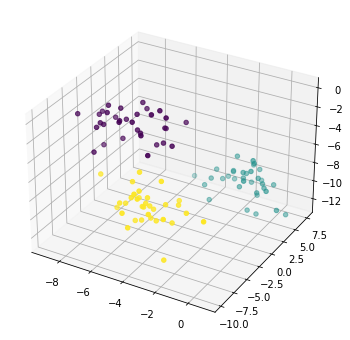

In [4]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=labels)

### PCA

Declare a PCA model with a 2-dimensional embedded space. For this, use `sklearn`'s built-in function `PCA`.

In [5]:
pca = PCA(n_components=2)

Fit the data and make the transformation into the lower dimensional space. For this, you can use the `.fit()` and `.transform()` implementations.

In [6]:
pca.fit(X3d)
X_reduced_pca = pca.transform(X3d)

print("The features of the first sample are: %s" % X_reduced_pca[0])

The features of the first sample are: [-3.64208744  3.53737985]


### t-SNE

Declare a t-SNE model with a 2-dimensional embedded space. For this, use `sklearn`'s built-in function `TSNE`. Use _random\_state=0_.

In [7]:
tsne = TSNE(n_components=2, random_state=0)

Fit the data and make the transformation into the lower dimensional space. For this, you can use the `.fit_transform()` implementation, which performs both operations at the same time.

In [8]:
X_reduced_tsne = tsne.fit_transform(X3d)

print("The features of the first sample are: %s" % X_reduced_tsne[0])

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


The features of the first sample are: [-9.073866 -5.150244]


### Visualize the results

The features are reduced in both cases to a 2d space. Please note that they are not the same because the two techniques optimize different objectives.

Let's plot the resulting embeddings to see the results.

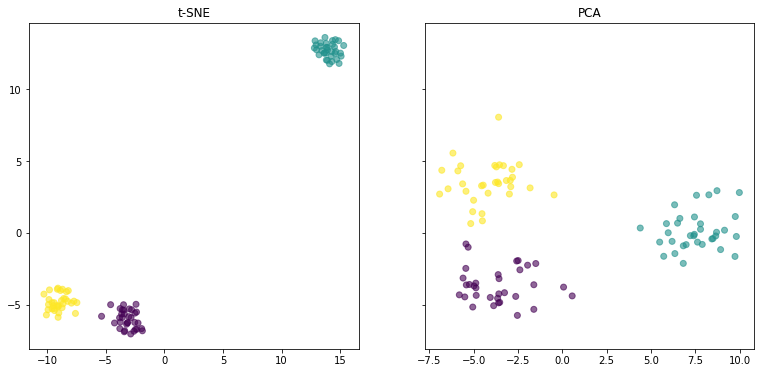

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(13,6), sharey=True)

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[0].set_title("t-SNE")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")

plt.show()

We can see how both algorithms split the data into three clusters, which actually correspond to the very same clusters found by the K-Means model.

## Explained variance of PCA

As you know, PCA algorithm compresses the data to features so that the amount of explained variance retained is maximized. Let's have a look at how the number of components chosen affects the percentage of variance explained.

First, declare and fit two different PCA models: with 2 and 3 number of components, respectively. Again, we leave you the documentation as a reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
# Declare and fit PCA 2
pca_2 = PCA(n_components=2)
pca_2.fit(X3d)

# Declare and fit PCA 3
pca_3 = PCA(n_components=3)
pca_3.fit(X3d)

PCA(n_components=3)

Before moving on: what do you think the percentage of explained variance will be for the PCA model with 3 components?

`insert your thoughts here`

Calculate the percentage of variance explained by each of the selected components. For this, you can use the attribute `explained_variance_ratio_`, check out the documentation for more.

In [11]:
explained_variance_ratio = pca_2.explained_variance_ratio_

Use numpy's function `.sum()` to obtain the total percentage of explained variance:

In [12]:
explained_variance_ratio.sum()

0.9562770962113176

Follow the same process for the PCA with 3 components. What do you observe?

In [13]:
pca_3.explained_variance_ratio_.sum()

1.0